# Spint 5 - Integrated Project I
---
## Introduction

In this project, we will be working for an online video game vendor named Ice. We will analyze historical video game data going back from 2016. We will identify patterns in the data that determine if a game succeeds snd use this information to identify successful titles, as well as plan an advertising campaign.

The dataset we've analyzed in this notebook can be found here:

<a href='https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv'>games.csv</a>

We will test the following <strong>hypotheses</strong>:
- Average user ratings of the Xbox One and PC platforms are the same. 
- Average user ratings for the Action and Sports genres are different.

This project will consist of:
1. Data Overview
2. Data Analysis
3. Hypotheses Testing
4. Conclusion

<em>ENJOY!</em>


## Data Overview
---

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import statistics as st
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/User2/Desktop/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
#checking missing values
df.isna().sum()


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [4]:
#viewing rows with issing name to see if any valuable data
df[df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [5]:
#removing above 2 rows and resetting index
df = df.dropna(subset='Name').reset_index(drop=True)
#confirming removal
df['Name'].isna().sum()


0

In [6]:
#checking for any unconventional placeholders for missing values
df['Year_of_Release'].value_counts(dropna=False)

Year_of_Release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: count, dtype: int64

In order to change these values to integer dtype we'll have to switch to 'Int64'

In [7]:
#changing float values to integers
df['Year_of_Release'] = df['Year_of_Release'].astype('Int64')
#changing missing values to 'unknown'
df['Year_of_Release'] = df['Year_of_Release'].astype('object').fillna('unknown')
#confirming changes
df['Year_of_Release'].value_counts(dropna=False)

Year_of_Release
2008       1427
2009       1426
2010       1255
2007       1197
2011       1136
2006       1006
2005        939
2002        829
2003        775
2004        762
2012        653
2015        606
2014        581
2013        544
2016        502
2001        482
1998        379
2000        350
1999        338
1997        289
unknown     269
1996        263
1995        219
1994        121
1993         60
1981         46
1992         43
1991         41
1982         36
1986         21
1989         17
1983         17
1990         16
1987         16
1988         15
1985         14
1984         14
1980          9
Name: count, dtype: int64

In [8]:
#checking critic score missing values 
df['Critic_Score'].value_counts(dropna=False)

Critic_Score
NaN     8576
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
20.0       3
21.0       1
17.0       1
22.0       1
13.0       1
Name: count, Length: 83, dtype: int64

We'll leave these as is and will revisit once data has been cleaned to better analyze the data and see if we can figure out why these score are missing and how to best handle them.

In [9]:
#checking the user score missing values 
df['User_Score'].value_counts(dropna=False)

User_Score
NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 97, dtype: int64

Here we'll have to change the dtype to numeric and coerce the errors to convert the 'tbd' values to NaN. This will aloow us to manipulate the values once we decide on how to handle this missing data.

In [10]:
# converting 'tbd' to NaN values
df['User_Score']= pd.to_numeric(df['User_Score'],errors='coerce')
#confirming changes
df['User_Score'].value_counts(dropna=False)


User_Score
NaN    9123
7.8     324
8.0     290
8.2     282
8.3     254
       ... 
1.5       2
0.3       2
1.1       2
0.0       1
9.7       1
Name: count, Length: 96, dtype: int64

In [11]:
#checking rating missing values
df['Rating'].value_counts(dropna=False)

Rating
NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

In [12]:
# changing missing values to 'unknown'
df['Rating'] = df['Rating'].fillna('unknown')
#confirming changes
df['Rating'].value_counts(dropna=False)

Rating
unknown    6764
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: count, dtype: int64

In [13]:
#checking for duplicates
df.duplicated().sum()

0

Now that we've identified missing values and found no duplicates in our sample; we can now make the following changes to finish cleaning this DataFrame for preprocessing:
- column names to lowercase
- `Platform` , `Genre`, & `Rating` dtypes to category to increase overall efficiency
- `User_Score` value scale (0-10) to match `Critic_Score` (0-100) to better analyze the dataset
- create a `total_sales` column to better compare performance of individual games, genres, platform, etc.

In [14]:
#revisiting dtypes 
df.info()
#viewing the first rows of the dataset
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16713 non-null  object 
 3   Genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       7590 non-null   float64
 10  Rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown


In [15]:
#checking platform values for any possible issues
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [16]:
# checking unique genre values with counts
print(df['Genre'].value_counts())

Genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64


Should consolidate the number of unique values down to 10. Bottom 2 genres, 'Puzzle' and 'Strategy' in with 'Misc"

In [17]:
df['Genre'] = df['Genre'].replace({'Puzzle':'Misc','Strategy':'Misc'})
# confirming changes
df['Genre'].nunique()

10

In [18]:
# changing column names to lowercase
df.columns = map(str.lower, df.columns)
# confirming changes
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [19]:
# changing `Platform to category dtype 
df['platform'] = df['platform'].astype('category')
#changing 'Genre' to category dtype
df['genre'] = df['genre'].astype('category')
#changing 'Rating to category dtype
df['rating'] = df['rating'].astype('category')
#confirming changes
df.info()
df.sample(15, random_state=15620)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16713 non-null  category
 2   year_of_release  16713 non-null  object  
 3   genre            16713 non-null  category
 4   na_sales         16713 non-null  float64 
 5   eu_sales         16713 non-null  float64 
 6   jp_sales         16713 non-null  float64 
 7   other_sales      16713 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           16713 non-null  category
dtypes: category(3), float64(6), object(2)
memory usage: 1.1+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15332,Date A Live: Arusu Install,PS3,2014,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,unknown
130,The Elder Scrolls V: Skyrim,PS3,2011,Role-Playing,2.55,2.60,0.25,1.00,92.0,6.4,M
1059,BioShock Infinite,PS3,2013,Shooter,0.72,0.65,0.04,0.28,94.0,8.5,M
15255,Happiness! De-Lucks,PS2,2007,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,unknown
13405,Crazy Chicken: Atlantis Quest,DS,2007,Platform,0.04,0.00,0.00,0.00,NaN,NaN,unknown
10476,Corvette Evolution GT,DS,2008,Racing,0.10,0.00,0.00,0.01,NaN,NaN,E
3390,Rock Band 2,PS2,2008,Misc,0.29,0.23,0.00,0.08,NaN,8.0,T
10707,Piglet's Big Game,PS2,2003,Platform,0.05,0.04,0.00,0.01,NaN,NaN,E
2864,XCOM: Enemy Unknown,PC,2012,Misc,0.27,0.36,0.00,0.08,89.0,8.2,M
13929,TMNT,DS,2007,Action,0.03,0.01,0.00,0.00,42.0,2.2,E10+


In [20]:
# changing user score values to 100 point scale
df['user_score'] = df['user_score'] * 10
#confirming changes
df.sample(15, random_state= 15620)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15332,Date A Live: Arusu Install,PS3,2014,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,unknown
130,The Elder Scrolls V: Skyrim,PS3,2011,Role-Playing,2.55,2.60,0.25,1.00,92.0,64.0,M
1059,BioShock Infinite,PS3,2013,Shooter,0.72,0.65,0.04,0.28,94.0,85.0,M
15255,Happiness! De-Lucks,PS2,2007,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,unknown
13405,Crazy Chicken: Atlantis Quest,DS,2007,Platform,0.04,0.00,0.00,0.00,NaN,NaN,unknown
10476,Corvette Evolution GT,DS,2008,Racing,0.10,0.00,0.00,0.01,NaN,NaN,E
3390,Rock Band 2,PS2,2008,Misc,0.29,0.23,0.00,0.08,NaN,80.0,T
10707,Piglet's Big Game,PS2,2003,Platform,0.05,0.04,0.00,0.01,NaN,NaN,E
2864,XCOM: Enemy Unknown,PC,2012,Misc,0.27,0.36,0.00,0.08,89.0,82.0,M
13929,TMNT,DS,2007,Action,0.03,0.01,0.00,0.00,42.0,22.0,E10+


In [21]:
# creating column with total sales of each title
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
# confirming changes
df.sample(10, random_state=25252)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15411,Meikyuu Cross Blood: Reloaded,X360,2011,Action,0.00,0.00,0.02,0.00,NaN,NaN,unknown,0.02
8100,Daigasso! Band Brothers P,3DS,2013,Misc,0.00,0.00,0.18,0.00,NaN,NaN,unknown,0.18
11312,Knights in the Nightmare,DS,2008,Role-Playing,0.06,0.00,0.02,0.00,76.0,86.0,T,0.08
9712,The King of Fighters '98 Ultimate Match,PS2,2008,Fighting,0.04,0.03,0.03,0.01,NaN,NaN,unknown,0.11
4550,The Legend of Spyro: The Eternal Night,PS2,2007,Platform,0.21,0.16,0.00,0.05,54.0,54.0,E10+,0.42
11806,And1 Streetball,XB,2006,Action,0.06,0.02,0.00,0.00,NaN,NaN,unknown,0.08
486,Wave Race 64,N64,1996,Racing,1.98,0.58,0.34,0.04,NaN,NaN,unknown,2.94
12668,The History Channel: Battle for the Pacific,X360,2007,Shooter,0.05,0.00,0.00,0.00,35.0,61.0,T,0.05
6831,Dragon Ball Z: Sagas,XB,2005,Fighting,0.18,0.05,0.00,0.01,51.0,61.0,T,0.24
7748,Captain America: Super Soldier,PS3,2011,Action,0.10,0.06,0.00,0.03,61.0,73.0,T,0.19


Let's revisit the missign values in `user_score` and `critic_score`. First we'll isolate the rows with missing values in `critic_score` *OR* `user_score` and analyze any trends we might find.

In [22]:
# isolating rows with missing critic and user scores
df_no_scores = df[(df['user_score'].isna() == True)|(df['critic_score'].isna() == True)]
# printing results for analysis
df_no_scores.sample(15, random_state = 101001)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3945,Monster Hunter Freedom 2,PS3,2011,Role-Playing,0.00,0.00,0.50,0.00,NaN,NaN,unknown,0.50
16057,Dance! It's Your Stage,Wii,unknown,Misc,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
13850,Painkiller: Hell & Damnation,PS3,2013,Shooter,0.02,0.01,0.00,0.01,NaN,NaN,unknown,0.04
14392,Accel World: Ginyoku no Kakusei,PSP,2012,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,unknown,0.03
16673,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007,Action,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01
12264,Just Dance: Disney Party 2,X360,2015,Action,0.05,0.01,0.00,0.01,NaN,NaN,E,0.07
16651,Nintendogs and Cats Golden Retriever and New F...,3DS,2011,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
10778,Tokimeki Memorial: Taisen Pazurudama,PS,1996,Misc,0.00,0.00,0.09,0.01,NaN,NaN,unknown,0.10
14672,Dream Pinball 3D,DS,2008,Misc,0.03,0.00,0.00,0.00,NaN,NaN,E10+,0.03
8755,Doctor Who: Evacuation Earth,DS,2010,Adventure,0.00,0.13,0.00,0.02,NaN,NaN,unknown,0.15


Index 14217 shows the are some titles with values for `critic_score` but missing `user_score` values. We'll check the counts of those instances along with the inverse.

In [23]:
# number of rows with user score missing value & critic score value present 
df_no_scores[(df_no_scores['user_score'].isna() == True)&(df_no_scores['critic_score'].isna() == False)].count()


name               1120
platform           1120
year_of_release    1120
genre              1120
na_sales           1120
eu_sales           1120
jp_sales           1120
other_sales        1120
critic_score       1120
user_score            0
rating             1120
total_sales        1120
dtype: int64

In [24]:
# number of rows with user score present value & critic score value missing 
df_no_scores[(df_no_scores['user_score'].isna() == False)&(df_no_scores['critic_score'].isna() == True)].count()

name               573
platform           573
year_of_release    573
genre              573
na_sales           573
eu_sales           573
jp_sales           573
other_sales        573
critic_score         0
user_score         573
rating             573
total_sales        573
dtype: int64

Let's now find the average difference between the average `critic_score` values to the average `user_score` values and use that info to fill in the missing values in the above mentioned rows 

In [25]:
# finding the average difference between critic and user scores
df.describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000,16713.000000
mean,0.263302,0.145045,0.077625,0.047343,68.967679,71.250461,0.533315
std,0.813565,0.503359,0.308871,0.186742,13.938165,15.000061,1.548282
min,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,60.000000,64.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,71.000000,75.000000,0.170000
75%,0.240000,0.110000,0.040000,0.030000,79.000000,82.000000,0.470000
max,41.360000,28.960000,10.220000,10.570000,98.000000,97.000000,82.540000


The difference between the average (~2.28) and median (4) is minimal. I'll fill in the missing values in rows with ONE missing score with the present score's average difference.

In [26]:
score_diff = df['user_score'].mean() - df['critic_score'].mean()
def fill_scores(row):
    if pd.isna(row['user_score']) and not pd.isna(row['critic_score']):
        row['user_score'] = row['critic_score'] + score_diff
    elif pd.isna(row['critic_score']) and not pd.isna(row['user_score']):
        row['critic_score'] = max(0, row['user_score'] - score_diff)
    return row

df = df.apply(fill_scores, axis=1)
df.isna().sum()


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8003
user_score         8003
rating                0
total_sales           0
dtype: int64

We have 8003 rows with both `user_score` and `critic_score` missing values. We'll fill in missing values with the median scores of each title's given genres by rating to keep data as honest as possible.

In [27]:
# checking median user scores of genres by rating
df.groupby(['genre','rating'])['user_score'].median()

genre         rating 
Action        AO         86.000000
              E          66.282783
              E10+       69.000000
              EC               NaN
              M          76.000000
              T          73.282783
              unknown    73.000000
Adventure     E          67.282783
              E10+       63.000000
              EC         70.000000
              M          79.000000
              T          75.000000
              unknown    76.000000
Fighting      E          64.141391
              E10+       64.000000
              M          78.000000
              T          75.000000
              unknown    76.500000
Misc          E          70.282783
              E10+       70.000000
              EC               NaN
              K-A        81.000000
              M          75.641391
              RP         53.000000
              T          76.000000
              unknown    69.000000
Platform      E          75.000000
              E10+       69.14139

In [28]:
#filling in critic score missing values 
df['critic_score'] = df.groupby(['genre','rating'])['critic_score'].transform(lambda x: x.fillna(x.median()))
#confirming changes
df['critic_score'].isna().sum()

325

In [29]:
# filling in missing user score values
df['user_score'] = df.groupby(['genre','rating'])['user_score'].transform(lambda x: x.fillna(x.median()))
# confirming changes
df['user_score'].isna().sum()

325

In [30]:
# filling in missing critic score values
df['critic_score'] = df.groupby(['genre','rating'])['critic_score'].transform(lambda x: x.fillna(x.median()))
# confirming changes
df.isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       325
user_score         325
rating               0
total_sales          0
dtype: int64

Let's have a look at the data to evaluate best way to handle the remaining missing values.

In [31]:
# checking rows with missing critic & user score values
no_score = df[df['critic_score'].isna() == True]
no_score.head()



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,unknown,20.62
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,unknown,18.14
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,unknown,17.28
45,Super Mario 64,N64,1996,Platform,6.91,2.85,1.91,0.23,NaN,NaN,unknown,11.90


The first 5 titles with no scores seem like they'd score well given their total sales. Let's take the average critic and user scores of titles within their range of total sales. To find these numbers we'll group the titles in total sales tiers and find their score averages.

We'll fill in the missing values with the results to have a more accurate dataset to work with.

In [32]:
# creating function to engineer new temporary column necessary to categorize by total sales
def score_cat(row):
    if row['total_sales'] < 1.0:
        row['score_rank'] = 'Bust'
    elif row['total_sales'] >= 1.0 and row['total_sales'] < 5.0:
        row['score_rank'] = 'Good'
    elif row['total_sales'] >= 5.0 and row['total_sales'] < 10.0:
        row['score_rank'] = 'Great'
    elif row['total_sales'] >= 10.0:
        row['score_rank'] = 'Classic'
    else:
        row['score_rank'] = 'unknown'
    return row['score_rank']
# creating temp column
df['score_rank'] = df.apply(score_cat, axis=1)
# checking median user & critic scores for each score rank
print('User Score Median:')
print(df.groupby(['score_rank'])['user_score'].median())
print()
print('Critic Score Median:')
print(df.groupby(['score_rank'])['critic_score'].median())



User Score Median:
score_rank
Bust       72.0
Classic    80.0
Good       75.0
Great      77.0
Name: user_score, dtype: float64

Critic Score Median:
score_rank
Bust       68.0
Classic    83.0
Good       75.0
Great      85.0
Name: critic_score, dtype: float64


In [33]:
# grouping temp column to get median user & critic scores for missing values
df['user_score'] = df.groupby(['score_rank'])['user_score'].transform(lambda x: x.fillna(x.median()))
df['critic_score'] = df.groupby(['score_rank'])['critic_score'].transform(lambda x: x.fillna(x.median()))
# checking changes
df.isna().sum()
#removing temp column
df.drop('score_rank',axis=1)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,83.000000,80.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,75.000000,81.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,69.000000,73.0,unknown,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,67.000000,62.5,unknown,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,72.358609,76.0,unknown,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.000000,72.0,unknown,0.01


In [34]:
#assigning cleaned df to new variable signaling cleaned df
df_clean = df

Data cleaning done. Now we're ready to start our analysis!

## Data Analysis
---

We're going to look into the following:
- yearly performance of a few specific categories (e.g. `genre`, `platform`, region)
- spot any past and/or present trends and how long they last
- 

In [35]:
# eliminating unknown values to avoid errors when plotting
no_unknown = df_clean[df_clean['year_of_release']!='unknown'] 
# getting total releases per year grouped with genres
genre_counts = no_unknown.groupby(['year_of_release', 'genre'])['name'].count().unstack(fill_value=0)
# Getting total & average sales per year
total_sales_year = no_unknown.groupby(['year_of_release']).agg({'total_sales':('sum','mean')}).reset_index()
total_sales_year.columns = ['year','total_sales','average_sales']
print(f'Total counts by genre:\n\n{genre_counts.head(5)}\n')
print('Average Sales per Year: \n')
print(total_sales_year[['year','average_sales']].head())


Total counts by genre:

genre            Action  Adventure  Fighting  Misc  Platform  Racing  \
year_of_release                                                        
1980                  1          0         1     4         0       0   
1981                 25          0         0     2         3       1   
1982                 18          0         0     4         5       2   
1983                  7          1         0     2         5       0   
1984                  1          0         0     4         1       3   

genre            Role-Playing  Shooter  Simulation  Sports  
year_of_release                                             
1980                        0        2           0       1  
1981                        0       10           1       4  
1982                        0        5           0       2  
1983                        0        1           0       1  
1984                        0        3           0       2  

Average Sales per Year: 

   year  average_

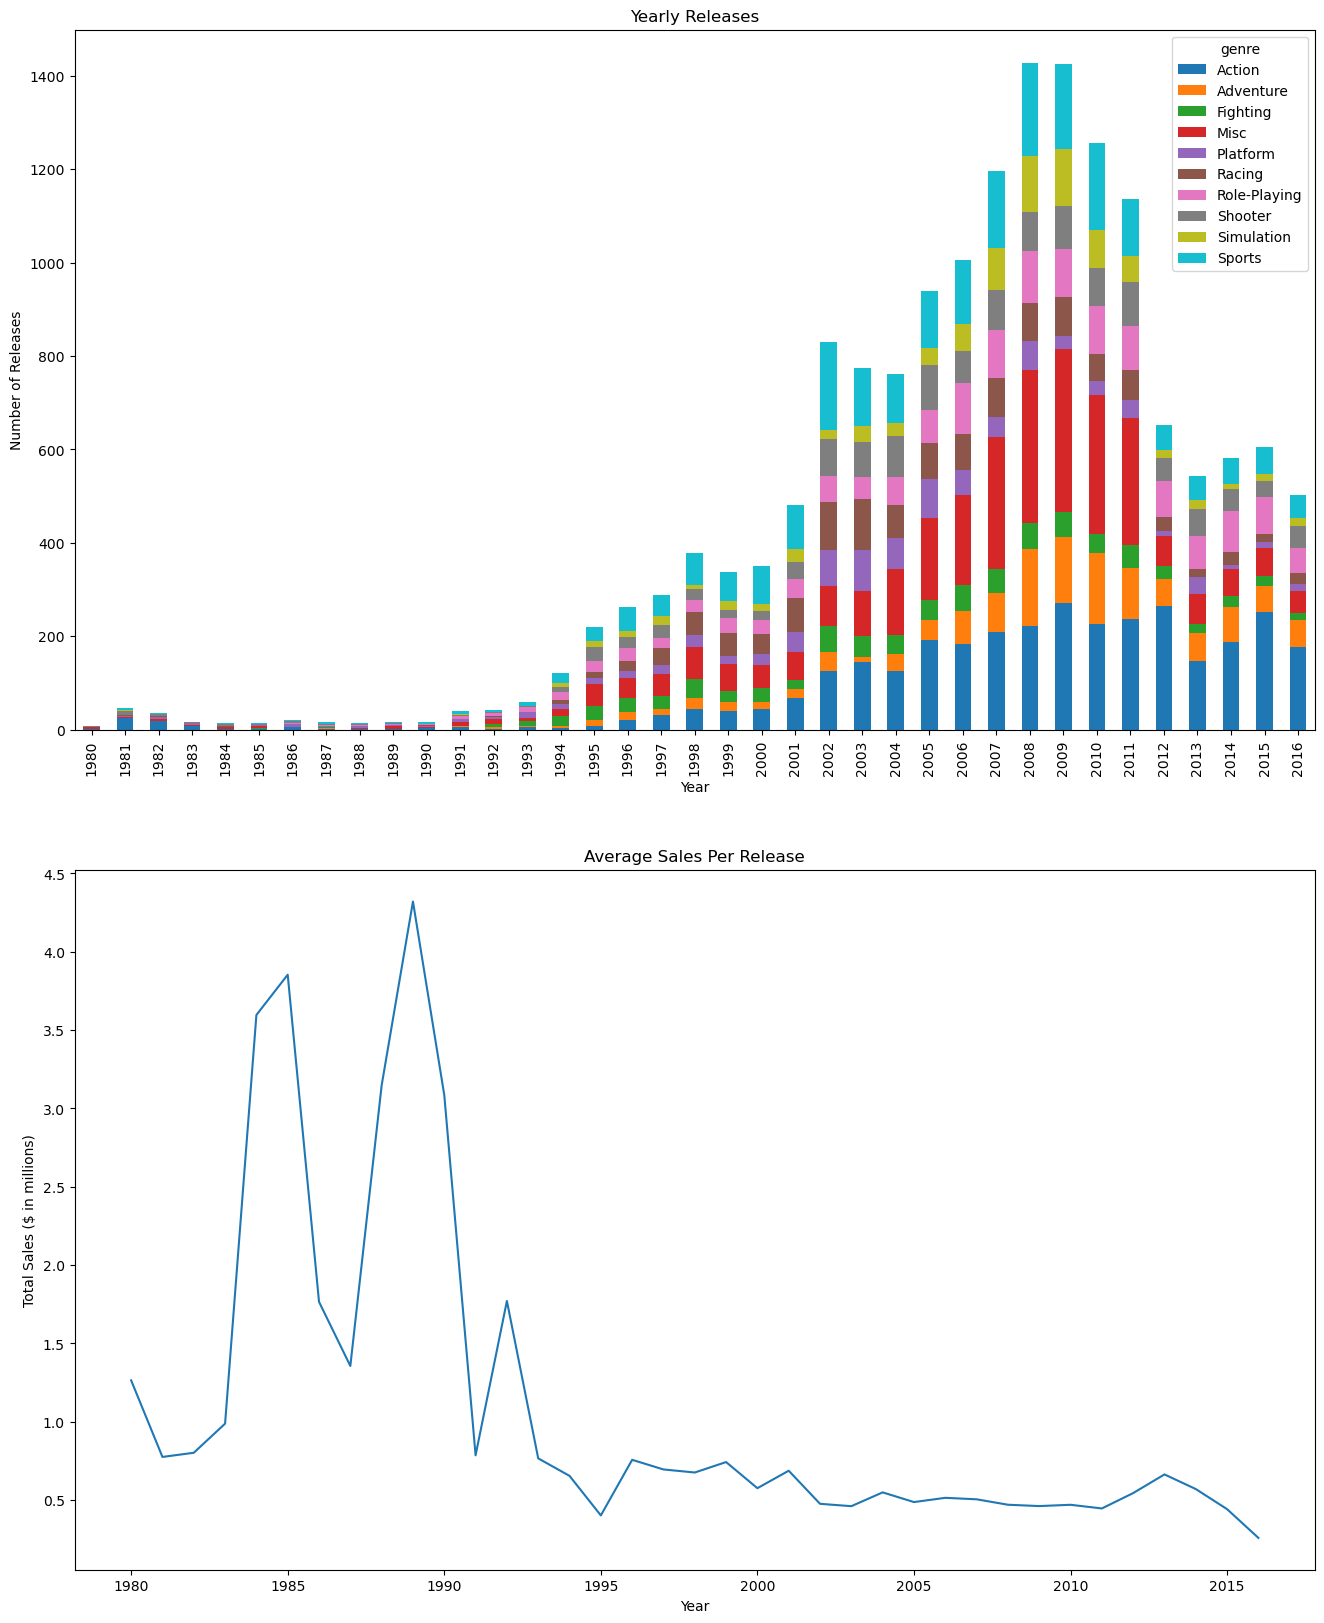

In [36]:
# creating subplots for total releases per year and average total sales per release
fig, axes = plt.subplots(2,1,figsize=(16,20))
genre_counts.plot(kind='bar', stacked=True, colormap='tab10', ax=axes[0])
sns.lineplot(total_sales_year, x='year',y='average_sales',ax=axes[1])
axes[0].set_title('Yearly Releases')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Releases')
axes[1].set_title('Average Sales Per Release')
axes[1].set_ylabel('Total Sales ($ in millions)')
axes[1].set_xlabel('Year')
plt.show()

Very low number of development within the first 10-15 years which is typical in a nascent market with only 9 titles in 1980 up to over 1400 in 2008-2009,as demonstrated in figure one above. Looking at the genres released throughout the years, 'Action' has had the most releases in the better part of the first decade but the number of 'Sports' titles took over during the mid-late 90s through mis 2000's. These numbers indicate popularity of said genres in those timeframes. It is likely due to the popularity of the top athletes of that decade (i.g Michael Jordan, Mike Tyson, Sammy Sosa, etc.)

We see the trend of the 'Action' genre increasing from the early 2000s through the end of the chart. It overtook the popularity of the 'Sports' genre in 2003 and the its lead has grown since. It's number of releases per year is approaching 50%.

What is phenominal is the average total sales per release in the first decade, as shown in the 2nd figure above. Although there was very little development compared to the later years, the average sales is indicative of the demand/interest of consumers very early. This likely fueled the number of releases per year starting 1994 with 100% increase in the number of releases in 1993 through the peak at 2008/09. As development rapidly increased during mid 90s, the average total sales per release stayed relatively flat through 2015 at about 25% of its all time high at ~$4.3 M average per title.

Let's take a look at some more overall yearly sales data, including top platforms to spot some trends, like how long it takes for new platforms to go on the market and how long it takes for old ones to fade.

In [37]:
# Finding top ten selling platforms
top_ten_platforms = list(df_clean.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).index[:10])
top_ten_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

In [38]:
# Creating DataFrame with only top ten selling platforms for analysis
top_platforms = df_clean.query('platform in @top_ten_platforms and year_of_release != "unknown"').sort_values(by='year_of_release') #sorting for better plotting
top_platforms.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,score_rank
15955,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,69.0,73.0,unknown,0.02,Bust
14468,Alter Ego,PC,1985,Simulation,0.00,0.03,0.00,0.01,59.0,58.0,T,0.04,Bust
14619,SimCity,PC,1988,Simulation,0.00,0.02,0.00,0.01,64.0,22.0,E10+,0.03,Bust
2611,The 7th Guest,PC,1992,Adventure,0.02,0.77,0.00,0.00,67.0,75.0,T,0.79,Bust
12649,Syndicate,PC,1992,Misc,0.00,0.05,0.00,0.01,68.0,69.0,unknown,0.06,Bust


An error has been identified. The title 'Strongest Tokyo University Shogi DS' is erroneously listed as released in 1985 but the 'DS' `platform` didn't release until 2004

I'll remove being that the `year_of_release` 'unknown' values are excluded from the visualization for a more accurate depiction of the data

In [39]:
# Dropping index with the year of release error
top_platforms=top_platforms.drop(15955)
top_platforms.head(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,score_rank
14468,Alter Ego,PC,1985,Simulation,0.00,0.03,0.0,0.01,59.000000,58.0,T,0.04,Bust
14619,SimCity,PC,1988,Simulation,0.00,0.02,0.0,0.01,64.000000,22.0,E10+,0.03,Bust
2611,The 7th Guest,PC,1992,Adventure,0.02,0.77,0.0,0.00,67.000000,75.0,T,0.79,Bust
12649,Syndicate,PC,1992,Misc,0.00,0.05,0.0,0.01,68.000000,69.0,unknown,0.06,Bust
14608,Doom,PC,1992,Shooter,0.02,0.00,0.0,0.00,85.000000,82.0,M,0.02,Bust
768,SimCity 2000,PC,1992,Simulation,1.20,0.84,0.0,0.10,72.858609,70.5,unknown,2.14,Good
15690,Empire Deluxe,PC,1992,Misc,0.02,0.00,0.0,0.00,68.000000,69.0,unknown,0.02,Bust


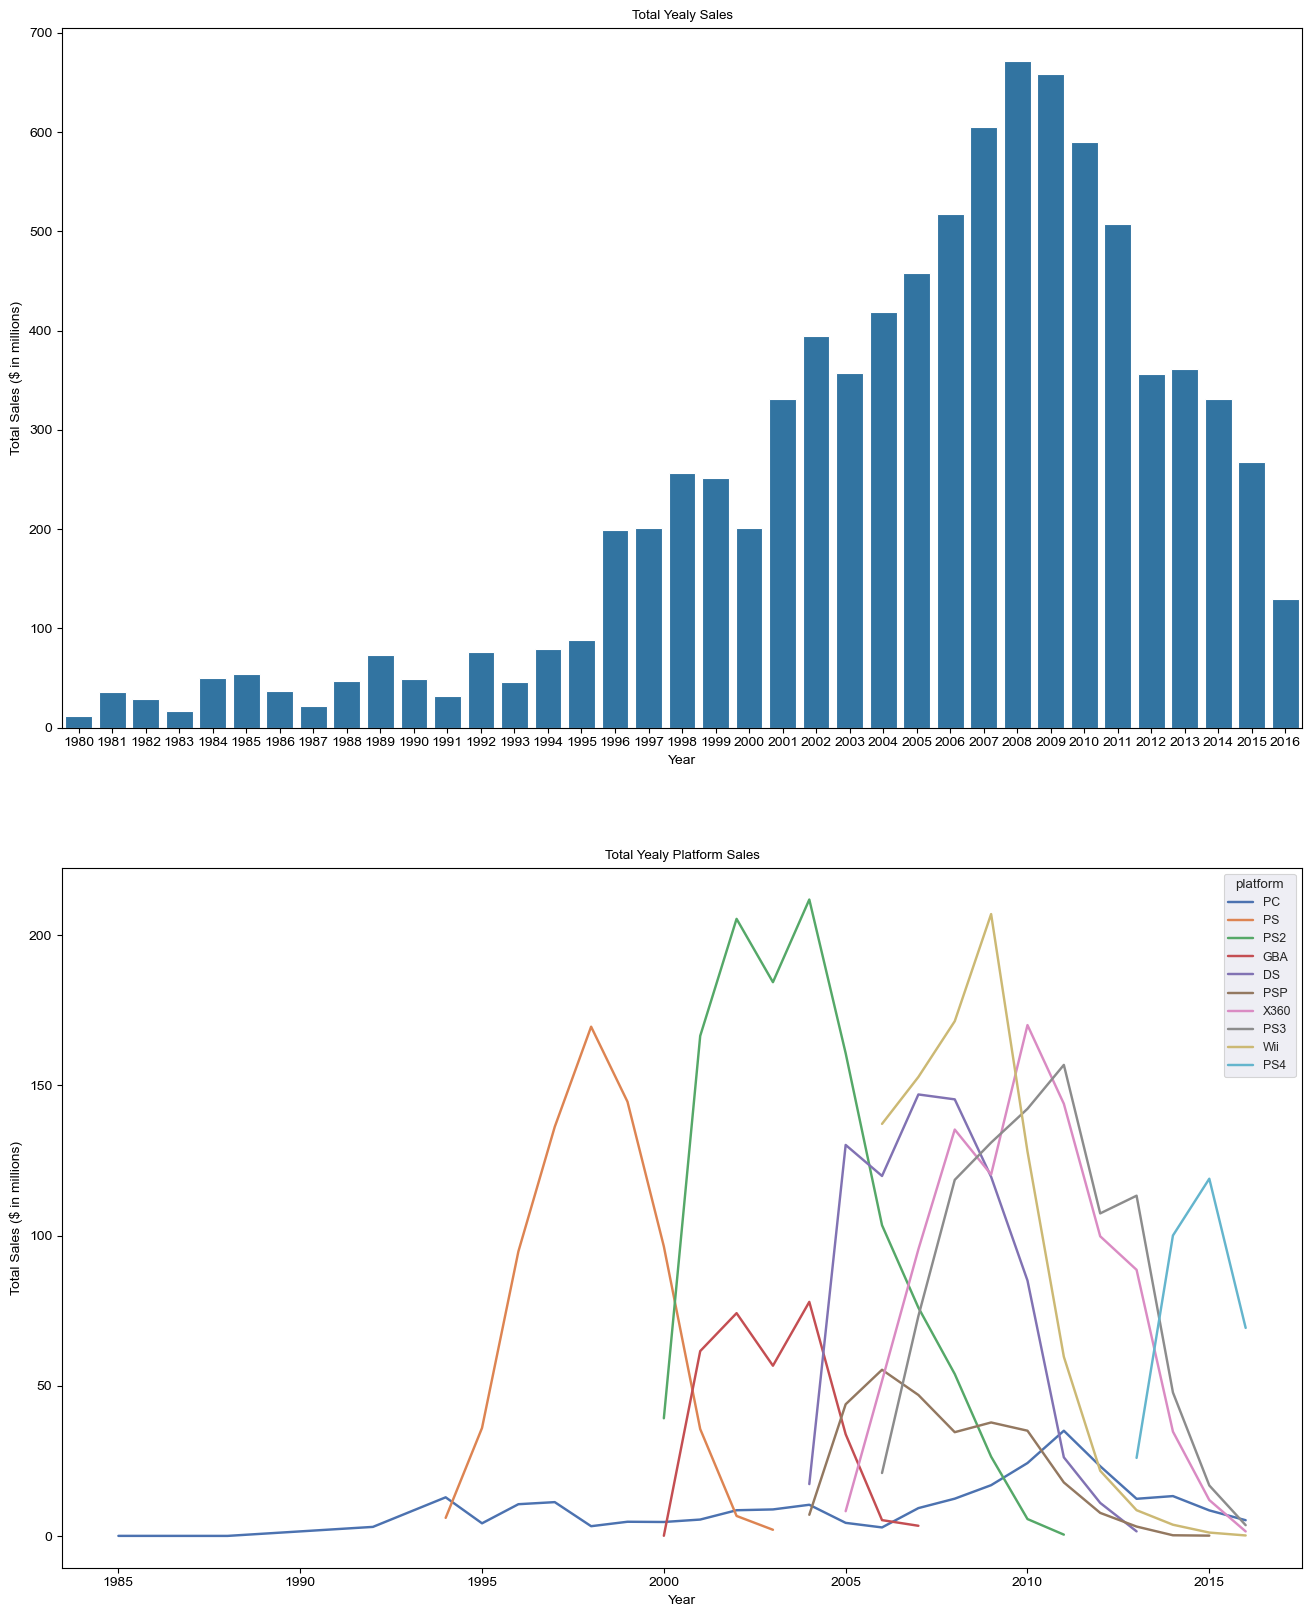

In [40]:
# Charting total sales per year and top platforms' sales plots
fig, axes =plt.subplots(2,1,figsize=(16,20))
sns.set_theme('paper')
sns.barplot(total_sales_year,x='year',y='total_sales',ax=axes[0])
sns.lineplot(top_platforms,x='year_of_release',y='total_sales',hue='platform',estimator='sum',err_style=None,linewidth=1.75,ax=axes[1])
axes[0].set_title('Total Yealy Sales')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Sales ($ in millions)')
axes[1].set_title('Total Yealy Platform Sales')

axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Sales ($ in millions)')
plt.show()

            

The total sales per year visual shows the sales followed the number of releases per year almost identically. The chart shows there is a downward trend in latest 7 years. Choosing the right platform, genre, and ratings would be the most sensible approach for success.

Judging from the top ten leading platforms in total sales,most of the platforms' sales numbers year over year looks like a normal distribution. Each platforms sales run from launch to finish is 7-11 years. The only exception is the 'PC' platform. It's clear that 'PS4' is the leading platform at the end of this dataset and would make the most sense to develop a game for it to have better odds for a successful release.

Now that we have a good overview of the full scope of the data, we'll just keep the last 5 years of data for further analysis.

In [41]:
# Removing data older than 5 years from latest data
recent_df = no_unknown[no_unknown['year_of_release'] >= (2016 - 5)]
# Confirming results
recent_df['year_of_release'].min()

2011

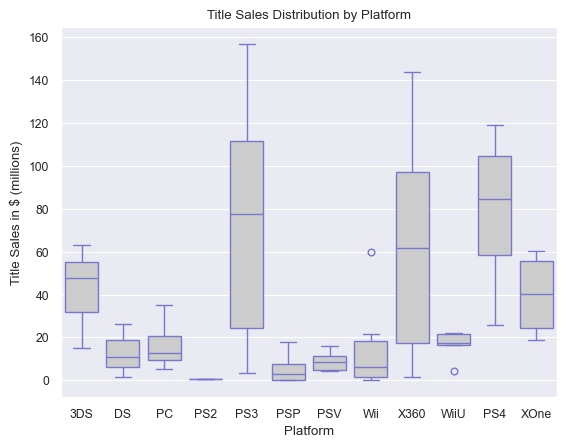

In [64]:
platform_sales_grp = recent_df.groupby(['year_of_release','platform']).agg({'total_sales':('sum','mean')}).reset_index()
platform_sales_grp.columns = ['year','platform','total_sales','average_sales']
sns.boxplot(data=platform_sales_grp,
            x='platform',y='total_sales',
            color='0.8',linecolor='#77C')
plt.title('Title Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Title Sales in $ (millions)')
plt.show()


In [ ]:
# Creating a class to make our user profiles
class UserProfile:
    def __init__(self, df, region):
        """
        Initialize the user profile for a specific region.
        
        :param df: DataFrame containing game sales data.
        :param region: The sales column representing the region (e.g., 'na_sales').
        """
        self.df = recent_df
        self.region = region
        self.top_genres = self.get_top_genres()
        self.top_platforms = self.get_top_platforms()
        self.top_games = self.get_top_games()
        self.top_ratings = self.get_top_ratings()

    def get_top_genres(self, top_n=5):
        """ Returns the top genres based on total sales in the region. """
        return self.df.groupby('genre')[self.region].sum().sort_values(ascending=False).head(top_n)

    def get_top_platforms(self, top_n=5):
        """ Returns the top platforms based on total sales in the region. """
        return self.df.groupby('platform')[self.region].sum().sort_values(ascending=False).head(top_n)

    def get_top_games(self, top_n=5):
        """ Returns the top-selling games in the region. """
        return self.df[['name', self.region]].sort_values(by=self.region, ascending=False).head(top_n)
    
    def get_top_ratings(self, top_n=5):
        """ Returns the average sales of each release according to rating in the region"""
        return self.df.groupby('rating')[self.region].sum().sort_values(ascending=False).head(top_n)

    def display_profile(self):
        """ Prints the regional profile in a structured format. """
        print(f"\n📊 User Profile for {self.region.upper()} 📊")
        print("\nTop Genres:")
        print(self.top_genres)
        print("\nTop Platforms:")
        print(self.top_platforms)
        print("\nTop Games:")
        print(self.top_games)
        print("\nAverage Sales by Rating:")
        print(self.top_ratings)

    def plot_top_genres(self):
        """ Plots a bar chart of the top genres for the region. """
        plt.figure(figsize=(6, 4))
        self.top_genres.plot(kind='bar', color='royalblue')
        plt.title(f"Top Genres in {self.region.upper()}")
        plt.xlabel("Genre")
        plt.ylabel("Total Sales (millions)")
        plt.xticks(rotation=45)
        
    
    def plot_top_platforms(self):
        """ Plots a bar chart of the top platforms for the region. """
        plt.figure(figsize=(6, 4))
        self.top_platforms.plot(kind='bar', color='royalblue')
        plt.title(f"Top Platforms in {self.region.upper()}")
        plt.xlabel("Platform")
        plt.ylabel("Total Sales (millions)")
        plt.xticks(rotation=45)

# Example Usage
#df = df[(df['year_of_release'] >= 1980) & (df['year_of_release'] <= 2016)]  # Filter dataset
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

# Create profiles for each region
profiles = {region: UserProfile(df, region) for region in regions}

# Displaying user profile for North America
print(profiles['na_sales'].display_profile())


📊 User Profile for NA_SALES 📊

Top Genres:
genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             79.91
Name: na_sales, dtype: float64

Top Platforms:
platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64

Top Games:
                              name  na_sales
23              Grand Theft Auto V      9.66
29  Call of Duty: Modern Warfare 3      9.04
35      Call of Duty: Black Ops II      8.25
16              Grand Theft Auto V      7.02
60            Call of Duty: Ghosts      6.73

Average Sales by Rating:
rating
M          308.45
E          170.17
unknown    123.69
E10+       117.72
T          109.31
Name: na_sales, dtype: float64
None


In [ ]:
# Displaying user profile for Europe
print(profiles['eu_sales'].display_profile())


📊 User Profile for EU_SALES 📊

Top Genres:
genre
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Misc             51.30
Name: eu_sales, dtype: float64

Top Platforms:
platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.70
Name: eu_sales, dtype: float64

Top Games:
                         name  eu_sales
16         Grand Theft Auto V      9.09
42         Grand Theft Auto V      6.31
77                    FIFA 16      6.12
31  Call of Duty: Black Ops 3      5.86
94                    FIFA 17      5.75

Average Sales by Rating:
rating
M          250.26
E          141.73
unknown    116.61
T           83.16
E10+        78.00
Name: eu_sales, dtype: float64
None


In [ ]:
# Displaying user profile for Japan
print(profiles['jp_sales'].display_profile())


📊 User Profile for JP_SALES 📊

Top Genres:
genre
Role-Playing    79.87
Action          63.62
Misc            25.29
Fighting        12.38
Platform        12.13
Name: jp_sales, dtype: float64

Top Platforms:
platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64

Top Games:
                                name  jp_sales
73         Animal Crossing: New Leaf      4.39
33               Pokemon X/Pokemon Y      4.35
385                 Monster Hunter 4      3.44
412        Yokai Watch 2 Ganso/Honke      3.18
83   Pokemon Black 2/Pokemon White 2      3.14

Average Sales by Rating:
rating
unknown    138.21
E           36.68
T           33.39
M           26.14
E10+        11.23
Name: jp_sales, dtype: float64
None


In [ ]:
# Displaying user profile for remaining regions
print(profiles['other_sales'].display_profile())


📊 User Profile for OTHER_SALES 📊

Top Genres:
genre
Action          64.14
Shooter         48.54
Sports          28.88
Role-Playing    19.68
Misc            14.93
Name: other_sales, dtype: float64

Top Platforms:
platform
PS3     64.82
PS4     48.35
X360    33.13
XOne    14.27
3DS     13.27
Name: other_sales, dtype: float64

Top Games:
                          name  other_sales
16          Grand Theft Auto V         3.96
34  Call of Duty: Black Ops II         2.42
31   Call of Duty: Black Ops 3         2.38
42          Grand Theft Auto V         1.97
81              FIFA Soccer 13         1.97

Average Sales by Rating:
rating
M          81.96
E          40.86
unknown    33.97
T          28.17
E10+       23.91
Name: other_sales, dtype: float64
None


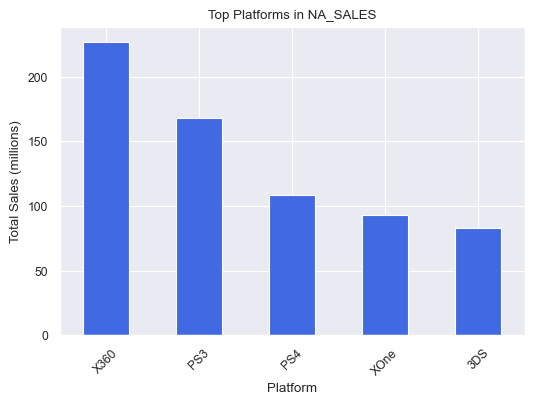

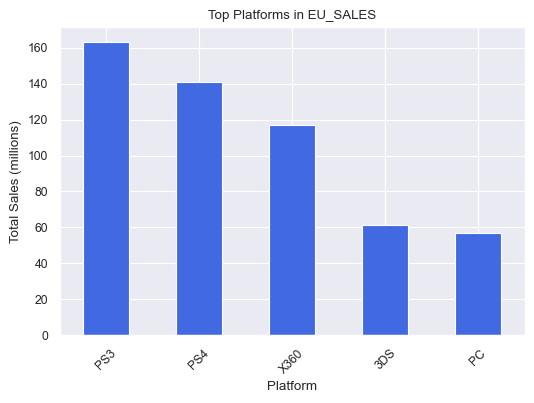

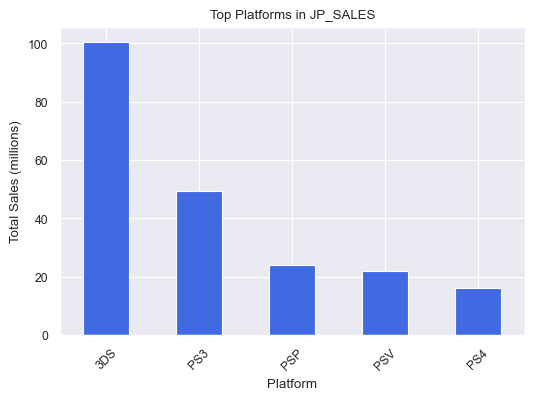

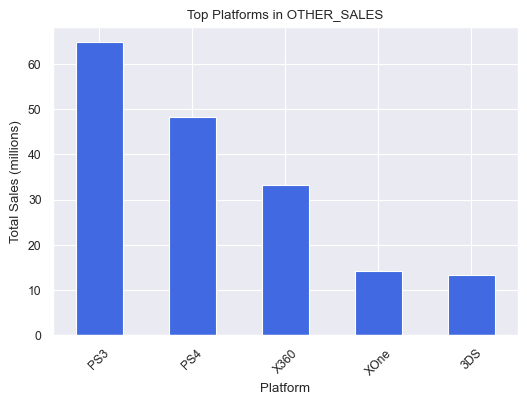

In [ ]:
# Plotting top platforms for all regions
profiles['na_sales'].plot_top_platforms()
profiles['eu_sales'].plot_top_platforms()
profiles['jp_sales'].plot_top_platforms()
profiles['other_sales'].plot_top_platforms()
plt.show()

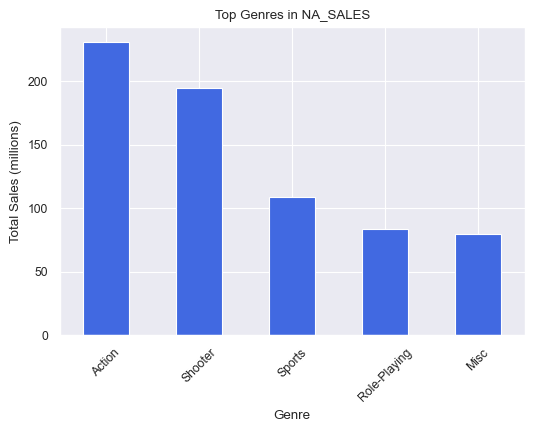

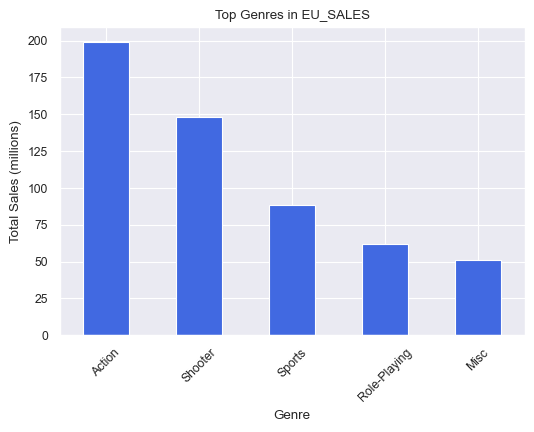

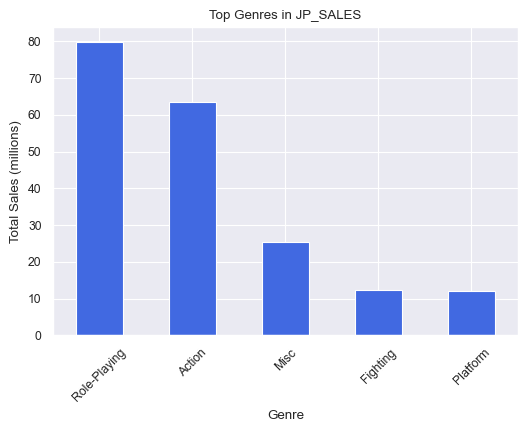

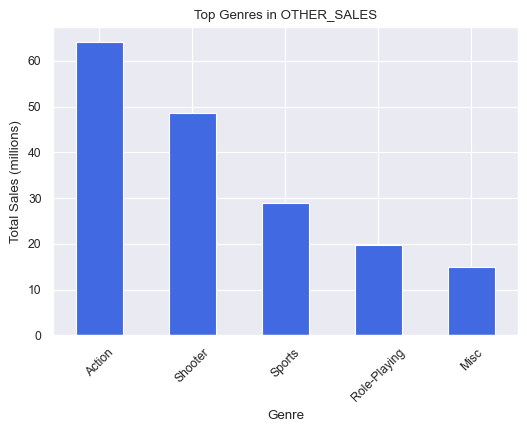

In [ ]:
# Plotting top genres for all regions
profiles['na_sales'].plot_top_genres()
profiles['eu_sales'].plot_top_genres()
profiles['jp_sales'].plot_top_genres()
profiles['other_sales'].plot_top_genres()
plt.show()

In [ ]:
x60_mean = recent_df[(recent_df['platform'] =='X360')&(recent_df['genre']=='Action')]
x60_mean['total_sales'].mean()

0.7427027027027027